In [53]:
from aotools.fouriertransform import *
from aotools import turbulence
from Propagation.basic_funcs import *
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def str_func(phz, mask, delta):
    N = (phz.shape)[0]

    phz = phz * mask


    P = ft2(phz, delta)
    S = ft2(phz ** 2, delta)
    W = ft2(mask, delta)

    delta_f = 1/(N*delta)

    w2 = ift2(W * np.conj(W), delta_f)


    D = (2 * ift2(np.real(S * np.conj(W)) - np.abs(P) ** 2, delta_f) / w2) * mask
    
    return D

    
def plot_slice(U, x, new_fig=True):
  if new_fig:
    plt.figure()
  I = np.abs(U[len(U) // 2])

  xx = x[len(x) // 2]


  plt.plot(xx, I)


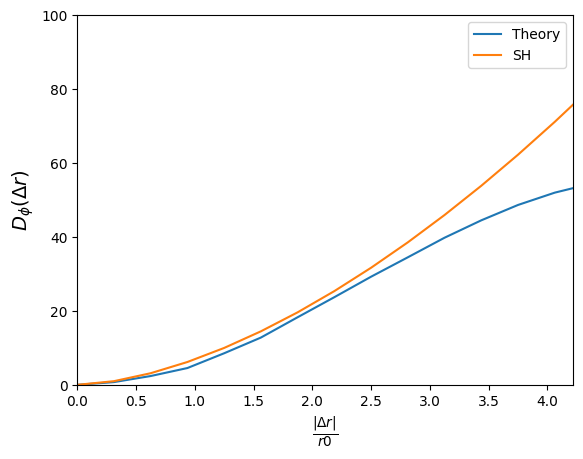

In [59]:

r0 = 0.1
N = 32
L = 1 # Grid size
delta = L / N

xx = np.linspace(-N/2, N/2-1, N) * delta
[x, y] = np.meshgrid(xx, xx)


theo_struc = 6.88 * (np.abs(xx)/r0) ** (5/3)

mask = circ(x, y, L*.9)



N_realizations = 1000
avg = 0

for i in range(N_realizations):
  phz = turbulence.ft_sh_phase_screen(r0, N, delta, 30., 0.01)
  avg += str_func(phz, mask, delta) / N_realizations




plot_slice(avg, x/ r0, False)
plt.plot(xx / r0, theo_struc)



plt.legend(["Theory","SH","FT"])
plt.xlim(0, 0.9*max(xx/r0))
plt.ylim(0, 100)


plt.xlabel(r'$\frac{| \Delta r |}{r0}$', fontsize=14, fontweight='bold')
plt.ylabel(r'$D_\phi (\Delta r)$', fontsize=14, fontweight='bold')


plt.show()

Checking validaty of PhaseGen

In [70]:
from Propagation.Propagator import *
from PhaseScreens.PhaseScreenGen import *


N_realizations = 10
avg = 0

Gen = PhaseScreenGen(r0, N, delta, 30., 0.01)
phz = Gen.generate_SH_instance().numpy()


for i in range(N_realizations):
  Gen = PhaseScreenGen(r0, N, delta, 30., 0.01)
  phz = Gen.generate_instance().numpy()
  phz = Gen.generate_SH_instance().numpy()
  # avg += str_func(phz, mask, delta) / N_realizations

plot_slice(avg, x/ r0, False)
plt.plot(xx / r0, theo_struc)



plt.legend(["Theory","SH","FT"])
plt.xlim(0, 0.9*max(xx/r0))
plt.ylim(0, 100)


plt.xlabel(r'$\frac{| \Delta r |}{r0}$', fontsize=14, fontweight='bold')
plt.ylabel(r'$D_\phi (\Delta r)$', fontsize=14, fontweight='bold')



2023-12-06 16:21:55.736314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_normal/shape/Const' with dtype int32
	 [[{{node random_normal/shape/Const}}]]
2023-12-06 16:21:55.736408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_normal/shape/Const' with dtype int32
	 [[{{node random_normal/shape/Const}}]]
2023-12-06 16:21:55.738421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_normal/shape/Const' with dtype int